In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.model_selection import KFold,cross_val_score, RepeatedStratifiedKFold,StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

import optuna
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer

from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,recall_score,f1_score,precision_score,roc_auc_score

#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import missingno as msno

import warnings
warnings.filterwarnings("ignore")

In [2]:
# bar grafiğindeki değerlerin gösterilmesi
# show values in bar graphic
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)



In [3]:
data = pd.read_csv('HR_Dataset.csv')

In [4]:
df = data.copy()
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  \
0                   3              0     1                      0   
1                   6              0     1                      0   
2                   4              0     1                      0   
3                   5              0     1                      0   
4                   3              0     1                      0   

  Departments   salary  
0        sales     low  
1        sales  medium  
2        sales  medium  
3        sales     low  
4        sales     low

In [5]:
# Sütun isimlerinde yer alan boşlukların ve büyük harflerin düzeltilmesi
df.columns = df.columns.str.lower().str.strip()
data.columns = data.columns.str.lower().str.strip()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
departments              0
salary                   0
dtype: int64

In [8]:
df.duplicated().sum()

3008

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   departments            11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [11]:
numerical = df.select_dtypes(exclude='object')

In [12]:
categorical = df.select_dtypes(include='object')

# Datanın görselleştirilmesi 


## Object sütunların analiz edilmesi ve görselleştirilmesi

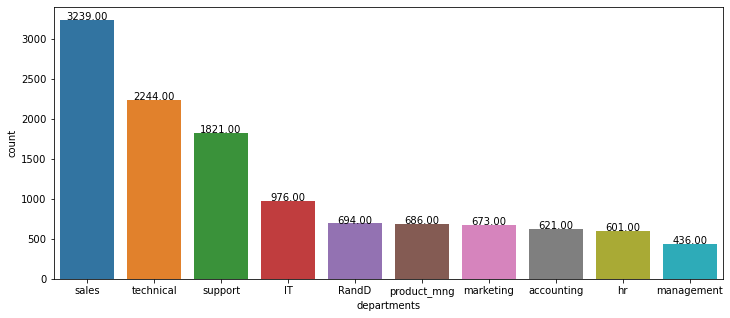

In [13]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data = df, x = 'departments',order = df['departments'].value_counts().index)
show_values_on_bars(ax);

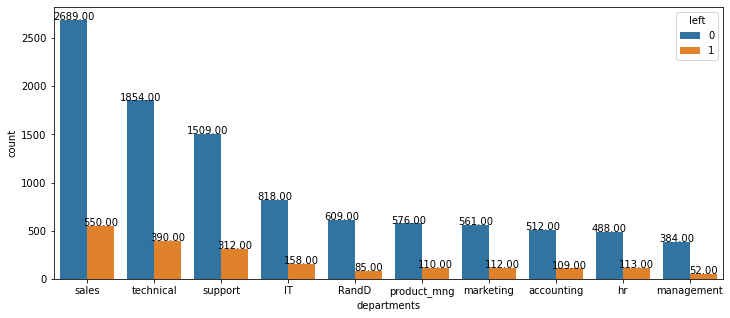

In [14]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data = df, x = 'departments',hue = 'left', order = df['departments'].value_counts().index)
show_values_on_bars(ax);

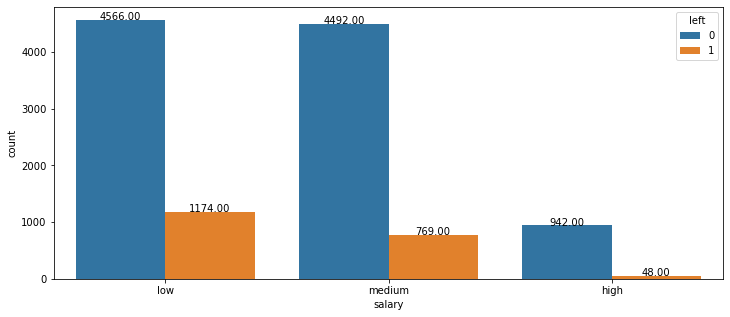

In [15]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data = df, x = 'salary',hue = 'left', order = df['salary'].value_counts().index)
show_values_on_bars(ax);

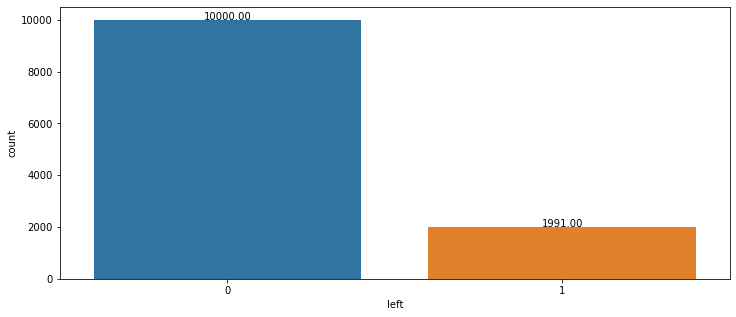

In [16]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data = df, x = 'left', order = df['left'].value_counts().index)
show_values_on_bars(ax);

In [17]:
df.describe()

satisfaction_level  last_evaluation  number_project  \
count        11991.000000     11991.000000    11991.000000   
mean             0.629658         0.716683        3.802852   
std              0.241070         0.168343        1.163238   
min              0.090000         0.360000        2.000000   
25%              0.480000         0.570000        3.000000   
50%              0.660000         0.720000        4.000000   
75%              0.820000         0.860000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  work_accident          left  \
count          11991.000000        11991.000000   11991.000000  11991.000000   
mean             200.473522            3.364857       0.154282      0.166041   
std               48.727813            1.330240       0.361234      0.372133   
min               96.000000            2.000000       0.000000      0.000000   
25%              157.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              243.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           11991.000000  
mean                0.016929  
std                 0.129012  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

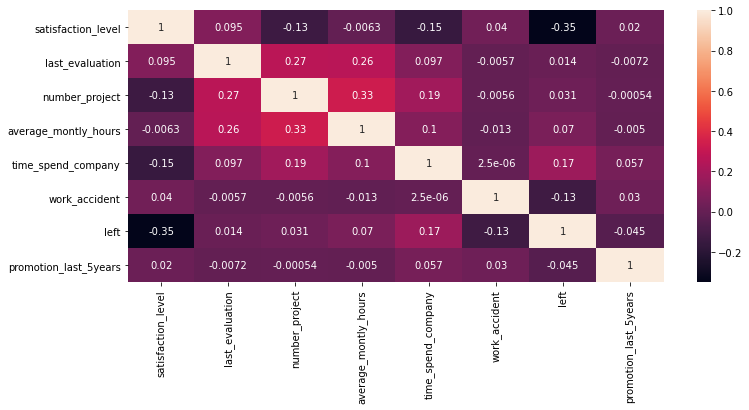

In [18]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True);

# Veri Ön Hazırlama ve Modellerin Kurulması

In [19]:
X = df.drop('left', axis=1)
y = df.left

In [20]:
print(f'Percentage of Churn:  {round(y.value_counts(normalize=True)[1]*100,2)} %  --> ({y.value_counts()[1]} employee)\nPercentage of customer did not churn: {round(y.value_counts(normalize=True)[0]*100,2)}  %  --> ({y.value_counts()[0]} employee)')


Percentage of Churn:  16.6 %  --> (1991 employee)
Percentage of customer did not churn: 83.4  %  --> (10000 employee)


In [21]:
numerical= df.select_dtypes('number').columns

categorical = df.select_dtypes('object').columns

print(f'Numerical Columns:  {df[numerical].columns}')
print('\n')
print(f'Categorical Columns: {df[categorical].columns}')

Numerical Columns:  Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years'],
      dtype='object')


Categorical Columns: Index(['departments', 'salary'], dtype='object')


In [22]:
## Catboost 

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   promotion_last_5years  11991 non-null  int64  
 7   departments            11991 non-null  object 
 8   salary                 11991 non-null  object 
dtypes: float64(2), int64(5), object(2)
memory usage: 1.2+ MB


In [24]:
for i in X.columns:
    if X[i].dtypes != 'object':
        X[i] = X[i].astype('float64')

In [25]:
np.where(X.dtypes != np.float)[0]

array([7, 8], dtype=int64)

In [26]:
categorical_features_indices = np.where(X.dtypes != np.float)
categorical_features_indices

(array([7, 8], dtype=int64),)

In [27]:
accuracy= []
recall =[]
roc_auc= []
precision = []

model_names =[]






X= df.drop('left', axis=1)
y= df['left']

categorical_features_indices = np.where(X.dtypes != np.float)[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

catboost_base = CatBoostClassifier(verbose=False,random_state=0,scale_pos_weight=4)

catboost_base.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_test, y_test))
y_pred = catboost_base.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),4))
recall.append(round(recall_score(y_test, y_pred),4))
roc_auc.append(round(roc_auc_score(y_test, y_pred),4))
precision.append(round(precision_score(y_test, y_pred),4))

model_names = ['Catboost_default']
result_df1 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision}, index=model_names)
result_df1

Accuracy  Recall  Roc_Auc  Precision
Catboost_default    0.9739  0.9187   0.9519     0.9249

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2995
           1       0.92      0.92      0.92       603

    accuracy                           0.97      3598
   macro avg       0.95      0.95      0.95      3598
weighted avg       0.97      0.97      0.97      3598



In [29]:
accuracy= []
recall =[]
roc_auc= []
precision = []





df= pd.get_dummies(df)
X= df.drop('left', axis=1)
y= df['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgbc_base = XGBClassifier(random_state=0)

xgbc_base.fit(X_train, y_train)
y_pred = xgbc_base.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),4))
recall.append(round(recall_score(y_test, y_pred),4))
roc_auc.append(round(roc_auc_score(y_test, y_pred),4))
precision.append(round(precision_score(y_test, y_pred),4))

model_names = ['XGBoost_Default']
result_df4 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision}, index=model_names)
result_df4

[16:33:18] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Accuracy  Recall  Roc_Auc  Precision
XGBoost_Default    0.9811  0.9121   0.9535     0.9735

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2995
           1       0.97      0.91      0.94       603

    accuracy                           0.98      3598
   macro avg       0.98      0.95      0.97      3598
weighted avg       0.98      0.98      0.98      3598



In [31]:
overfitting_control = xgbc_base.predict(X_train)

In [32]:
print(classification_report(y_train,overfitting_control))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7005
           1       1.00      0.99      0.99      1388

    accuracy                           1.00      8393
   macro avg       1.00      0.99      1.00      8393
weighted avg       1.00      1.00      1.00      8393



In [33]:
accuracy =[]
recall = []
f1 = []
precision = []

model_names =[]


X= df.drop('left', axis=1)
y= df['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler()
ohe= OneHotEncoder(sparse=False)
#ct= make_column_transformer((scaler,numerical),(ohe,categorical),remainder='passthrough')  



lr = LogisticRegression(solver='liblinear')
lda= LinearDiscriminantAnalysis()
svm = SVC(gamma='scale')
knn = KNeighborsClassifier()
rf = RandomForestClassifier()

models = [lr,lda,svm,knn,rf]

for model in models: 
    pipe = make_pipeline(OneHotEncoder(sparse=False),MinMaxScaler(), model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    accuracy.append(round(accuracy_score(y_test, y_pred),4))
    recall.append(round(recall_score(y_test, y_pred),4))
    f1.append(round(f1_score(y_test, y_pred),4))
    precision.append(round(precision_score(y_test, y_pred),4))
    
    
    print (f'model : {model} and  accuracy score is : {round(accuracy_score(y_test, y_pred),4)}')
    print (f'model : {model} and  recall score is : {round(recall_score(y_test, y_pred),4)}')
    print (f'model : {model} and  f1 score is : {round(f1_score(y_test, y_pred),4)}')
    print (f'model : {model} and  precision score is : {round(precision_score(y_test, y_pred),4)}')
model_names = ['Logistic','LinearDiscriminant','SVM','KNeighbors','RandomForest']
result_df1 = pd.DataFrame({'Accuracy':accuracy,'f1_score':f1,'Recall':recall,'Precision':precision}, index=model_names)
result_df1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

model : LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False) and  accuracy score is : 0.9622
model : LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False) and  recall score is : 0.8706
model : LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solv

<IPython.core.display.Javascript object>

model : LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001) and  accuracy score is : 0.9491
model : LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001) and  recall score is : 0.8391
model : LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001) and  f1 score is : 0.8469
model : LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001) and  precision score is : 0.8547


<IPython.core.display.Javascript object>

model : SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) and  accuracy score is : 0.965
model : SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) and  recall score is : 0.859
model : SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) and  f1 score is : 0.8916
model : SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale

<IPython.core.display.Javascript object>

model : KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') and  accuracy score is : 0.9291
model : KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') and  recall score is : 0.8109
model : KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') and  f1 score is : 0.7932
model : KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') and  precision score is : 0.7762


<IPython.core.display.Javascript object>

model : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) and  accuracy score is : 0.9639
model : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, 

Accuracy  f1_score  Recall  Precision
Logistic              0.9622    0.8853  0.8706     0.9005
LinearDiscriminant    0.9491    0.8469  0.8391     0.8547
SVM                   0.9650    0.8916  0.8590     0.9267
KNeighbors            0.9291    0.7932  0.8109     0.7762
RandomForest          0.9639    0.8879  0.8541     0.9246

In [34]:
pd.DataFrame({})

Empty DataFrame
Columns: []
Index: []

In [35]:
accuracy_score(y_test,y_pred)

0.9638688160088938

In [36]:
recall_score(y_test,y_pred)

0.8540630182421227